#Dataworkshop 3city -  **Predicting flats prices using MLP.**

## Install eli5 library to check features importance.

In [1]:
!pip install eli5

## Data loading, cleaning and preprocessing.

In [2]:
import os
import pandas as pd
import numpy as np

###Load data from GDrive

In [3]:
os.chdir("/content/drive/My Drive/Colab Notebooks/DW3city/dane z portali/Dane z 4 portali razem/train_test_split")
!pwd

/content/drive/.shortcut-targets-by-id/106/DataWorkshop Trójmiasto/dane z portali/Dane z 4 portali razem/train_test_split


In [4]:
df_train = pd.read_csv("x_train.csv")
df_validation = pd.read_csv("x_val.csv")
y_train = pd.read_csv("y_train.csv")
y_validation = pd.read_csv("y_val.csv")

df_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

In [5]:
df_train.shape, df_validation.shape, df_test.shape

((13658, 24), (4553, 24), (4553, 24))

### Check y values distribution and transform using log()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa40fcea748>]],
      dtype=object)

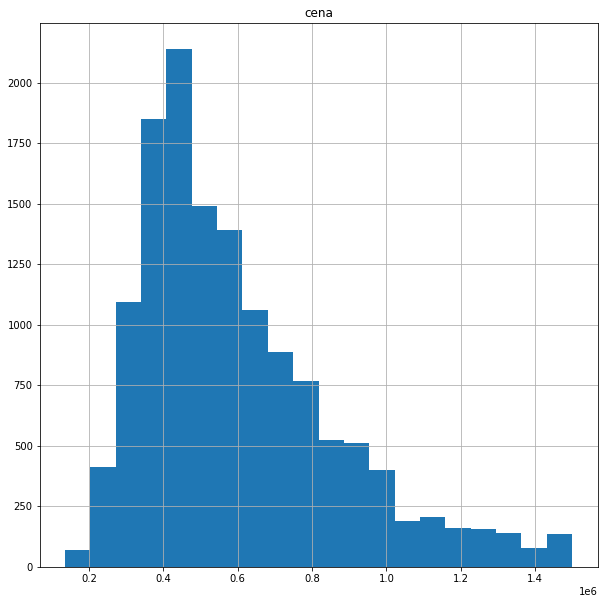

In [6]:
y_train.hist(bins=20, figsize=(10,10))

In [7]:
y_train_log = np.log(y_train)
y_validation_log=np.log(y_validation) 
y_test_log = np.log(y_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa40fc0c0b8>]],
      dtype=object)

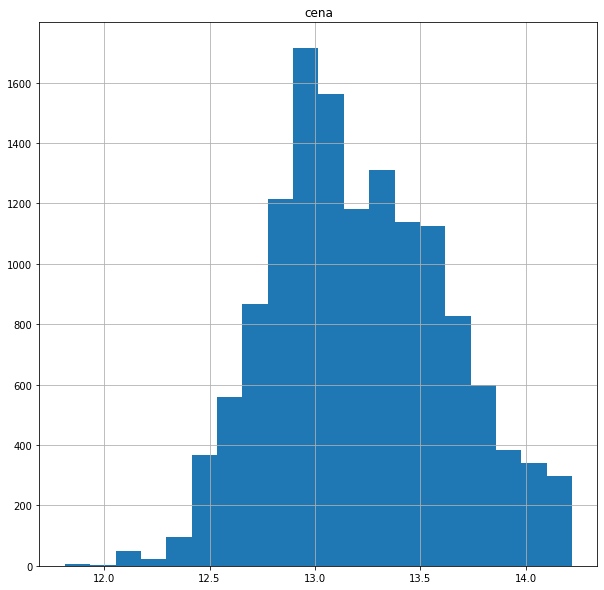

In [8]:
y_train_log.hist(bins=20, figsize=(10,10))

### Concat train, validation, test data for preprocessing

In [9]:
df_combined = pd.concat([df_train, df_validation, df_test], ignore_index=True)
df_combined

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,rodzaj_zabudowy,powierzchnia,dzielnica,forma-wlasnosci,adres,serwis,material_budynku,oferta,ogrzewanie,winda,czynsz,typ_ogrzewania,dodatkowe_informacje,ulica_i_nr
0,-1,-1,-1,5,2005,-1,2,-1,-1,3,-1,50.00,-1,-1,"Gdynia, Grabówek, Morska",trojmiasto,-1,-1,-1,-1,-1.0,-1,"Garaż, Winda, Kuchnia",-1
1,brak,wtórny,-1,3,2020,Gdynia,2,dowykończenia,-1,2,blok,39.72,-1,-1,"Gdynia, Obłuże",otodom,pustak,Oferta biura nieruchomości,miejskie,0,200.0,-1,-1,-1
2,-1,-1,-1,4,1970,-1,3,-1,-1,2,-1,54.00,-1,-1,"Gdańsk, Przymorze, Jagiellońska",trojmiasto,-1,-1,-1,-1,-1.0,-1,"Balkon, Piwnica, Kuchnia",-1
3,-1,-1,-1,4,2017,-1,4,-1,-1,4,-1,172.60,-1,-1,"Gdynia, Działki, Leśne, Nautikka",trojmiasto,-1,-1,-1,-1,-1.0,C. o. miejskie,"Garaż, Winda, Taras, Miejsce parkingowe, Inter...",-1
4,brak,wtórny,-1,10,1970,Gdynia,3,-1,-1,10,-1,54.10,-1,-1,"Gdynia, Chylonia, Lubawska",otodom,-1,Oferta biura nieruchomości,miejskie,0,-1.0,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22759,aneks,wtórny,-1,6,2020,Gdańsk,1,deweloperski,pszenna,2 / 6,apartamentowiec,42.70,śródmieście,własność,"gdańsk, śródmieście, pszenna",morizon,mieszana,-1,-1,-1,-1.0,-1,-1,-1
22760,-1,-1,-1,4,1968,-1,3,-1,-1,4,-1,47.00,-1,-1,"Gdańsk, Stogi, Stryjewskiego",trojmiasto,-1,-1,-1,-1,-1.0,Co,-1,-1
22761,-1,wtórny,-1,10,1978,Gdańsk,3,dozamieszkania,-1,0,blok,56.12,-1,-1,"Gdańsk, Suchanino",otodom,-1,Oferta biura nieruchomości,miejskie,1,-1.0,-1,-1,-1
22762,aneks,pierwotny,-1,-1,2021,Gdynia,2,-1,masztowa 21,-1,apartamentowiec,51.93,chylonia,własność,"gdynia, chylonia, masztowa 21",morizon,-1,-1,-1,-1,-1.0,-1,-1,-1


In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22764 entries, 0 to 22763
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   kuchnia                22764 non-null  object 
 1   rynek                  22764 non-null  object 
 2   balkon                 22764 non-null  object 
 3   liczba_pieter_budynku  22764 non-null  int64  
 4   rok_budowy             22764 non-null  int64  
 5   miasto                 22764 non-null  object 
 6   liczba_pokoi           22764 non-null  int64  
 7   wykonczenie            22764 non-null  object 
 8   ulica                  22764 non-null  object 
 9   pietro                 22764 non-null  object 
 10  rodzaj_zabudowy        22764 non-null  object 
 11  powierzchnia           22764 non-null  float64
 12  dzielnica              22764 non-null  object 
 13  forma-wlasnosci        22764 non-null  object 
 14  adres                  22762 non-null  object 
 15  se

### Fill in missing values

In [11]:
df_combined.fillna("-1")

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,rodzaj_zabudowy,powierzchnia,dzielnica,forma-wlasnosci,adres,serwis,material_budynku,oferta,ogrzewanie,winda,czynsz,typ_ogrzewania,dodatkowe_informacje,ulica_i_nr
0,-1,-1,-1,5,2005,-1,2,-1,-1,3,-1,50.00,-1,-1,"Gdynia, Grabówek, Morska",trojmiasto,-1,-1,-1,-1,-1.0,-1,"Garaż, Winda, Kuchnia",-1
1,brak,wtórny,-1,3,2020,Gdynia,2,dowykończenia,-1,2,blok,39.72,-1,-1,"Gdynia, Obłuże",otodom,pustak,Oferta biura nieruchomości,miejskie,0,200.0,-1,-1,-1
2,-1,-1,-1,4,1970,-1,3,-1,-1,2,-1,54.00,-1,-1,"Gdańsk, Przymorze, Jagiellońska",trojmiasto,-1,-1,-1,-1,-1.0,-1,"Balkon, Piwnica, Kuchnia",-1
3,-1,-1,-1,4,2017,-1,4,-1,-1,4,-1,172.60,-1,-1,"Gdynia, Działki, Leśne, Nautikka",trojmiasto,-1,-1,-1,-1,-1.0,C. o. miejskie,"Garaż, Winda, Taras, Miejsce parkingowe, Inter...",-1
4,brak,wtórny,-1,10,1970,Gdynia,3,-1,-1,10,-1,54.10,-1,-1,"Gdynia, Chylonia, Lubawska",otodom,-1,Oferta biura nieruchomości,miejskie,0,-1.0,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22759,aneks,wtórny,-1,6,2020,Gdańsk,1,deweloperski,pszenna,2 / 6,apartamentowiec,42.70,śródmieście,własność,"gdańsk, śródmieście, pszenna",morizon,mieszana,-1,-1,-1,-1.0,-1,-1,-1
22760,-1,-1,-1,4,1968,-1,3,-1,-1,4,-1,47.00,-1,-1,"Gdańsk, Stogi, Stryjewskiego",trojmiasto,-1,-1,-1,-1,-1.0,Co,-1,-1
22761,-1,wtórny,-1,10,1978,Gdańsk,3,dozamieszkania,-1,0,blok,56.12,-1,-1,"Gdańsk, Suchanino",otodom,-1,Oferta biura nieruchomości,miejskie,1,-1.0,-1,-1,-1
22762,aneks,pierwotny,-1,-1,2021,Gdynia,2,-1,masztowa 21,-1,apartamentowiec,51.93,chylonia,własność,"gdynia, chylonia, masztowa 21",morizon,-1,-1,-1,-1,-1.0,-1,-1,-1


### Transform floor number feature

In [12]:
df_combined.pietro.value_counts()[:30]

1              4347
2              3341
3              3129
4              1882
Parter         1871
0              1454
5               671
6               389
3 / 3           305
3 / 4           282
parter / 3      276
2 / 3           271
1 / 3           268
1 / 4           265
4 / 4           232
10              218
8               204
7               201
2 / 4           200
9               192
parter / 4      188
1 / 2           181
-1              177
parter / 2      173
2 / 2           155
11              123
4 / 5            61
1 / 5            60
1 / 6            54
1 / 1            54
Name: pietro, dtype: int64

In [13]:
def clean_pietro(x):
  try:
    splitted = x.split('/')[0].strip().lower()
  except Exception:
    splitted = x.lower()
  if splitted == 'parter':
    splitted = '0'
  return int(splitted)
clean_pietro('parter / 4')

0

In [14]:
df_combined.pietro= df_combined.pietro.apply(lambda x: clean_pietro(x))
df_combined.pietro.value_counts()

 1     5357
 2     4156
 0     4142
 3     3893
 4     2284
 5      824
 6      494
 10     272
 8      257
 7      257
 9      233
-1      177
 11     148
 17      60
 12      51
 15      45
 14      40
 16      39
 13      20
 18      13
 25       2
Name: pietro, dtype: int64

In [15]:
df_combined.liczba_pieter_budynku.value_counts()

 4     6359
 3     6072
 2     2525
 10    1745
 5     1517
 6      866
 1      561
 17     560
 7      463
 8      446
-1      374
 11     295
 12     251
 9      214
 0      214
 16     110
 18      92
 13      38
 15      25
 19       7
 20       6
 24       6
 25       4
 28       4
 14       4
 29       3
 23       3
Name: liczba_pieter_budynku, dtype: int64

### Create new, merged heating column based on two other columns

In [16]:
df_combined["ogrzewanie_merged"] = df_combined.ogrzewanie + df_combined.typ_ogrzewania
df_combined["ogrzewanie_merged"].value_counts()

-1-1                11886
-1Co miejskie        3380
miejskie-1           3116
-1C. o. miejskie     1180
-1Miejskie            824
                    ...  
-1Piec                  2
-1Gazowa                1
-1Miejskie c. o.        1
piecekaflowe-1          1
-1Ec                    1
Name: ogrzewanie_merged, Length: 71, dtype: int64

In [17]:
df_combined.ogrzewanie_merged =df_combined.ogrzewanie_merged.str.replace("-1-1","nan")
df_combined.ogrzewanie_merged =df_combined.ogrzewanie_merged.str.replace("-1","")
df_combined["ogrzewanie_merged"].value_counts()

nan                         11886
Co miejskie                  3380
miejskie                     3116
C. o. miejskie               1180
Miejskie                      824
                            ...  
Centralne ze spółdzielni        2
Gazowa                          1
piecekaflowe                    1
Miejskie c. o.                  1
Ec                              1
Name: ogrzewanie_merged, Length: 71, dtype: int64

In [18]:
df_combined.ogrzewanie_merged = df_combined.ogrzewanie_merged.str.lower()
df_combined["ogrzewanie_merged"].value_counts()

nan               11886
miejskie           3940
co miejskie        3380
gazowe             1211
c. o. miejskie     1180
                  ...  
logotermy             2
gazowa                1
miejskie c. o.        1
piecekaflowe          1
ec                    1
Name: ogrzewanie_merged, Length: 66, dtype: int64

In [19]:
df_combined.ogrzewanie_merged = df_combined.ogrzewanie_merged.apply(lambda x: "miejskie" if 'miejskie' in x else x)
df_combined.ogrzewanie_merged = df_combined.ogrzewanie_merged.apply(lambda x: "miejskie" if 'miejski' in x else x)
df_combined.ogrzewanie_merged = df_combined.ogrzewanie_merged.apply(lambda x: "gazowe" if 'gaz' in x else x)
df_combined.ogrzewanie_merged = df_combined.ogrzewanie_merged.apply(lambda x: "elektryczne" if 'elektryczne' in x else x)
df_combined.ogrzewanie_merged = df_combined.ogrzewanie_merged.apply(lambda x: "-1" if 'nan' in x else x)
df_combined["ogrzewanie_merged"].value_counts()

-1                                                  11888
miejskie                                             8665
gazowe                                               1267
elektryczne                                           226
centralne                                             174
co własne                                             166
inne                                                  135
co                                                     64
c. o.                                                  46
kotłownia                                              41
kotłownia lokalna                                      22
pompa ciepła                                            8
kominkowe                                               6
c. o                                                    6
centralne ogrzewanie                                    5
własne co                                               4
etażowe                                                 4
brak          

### Create numerical features from categorical feats.

In [20]:
df_combined.select_dtypes('object').columns

Index(['kuchnia', 'rynek', 'balkon', 'miasto', 'wykonczenie', 'ulica',
       'rodzaj_zabudowy', 'dzielnica', 'forma-wlasnosci', 'adres', 'serwis',
       'material_budynku', 'oferta', 'ogrzewanie', 'typ_ogrzewania',
       'dodatkowe_informacje', 'ulica_i_nr', 'ogrzewanie_merged'],
      dtype='object')

In [21]:
cat_feats = ['kuchnia', 
             'rynek', 
             'balkon', 
             'miasto', 
             'wykonczenie', 
             'ulica',
             'rodzaj_zabudowy', 
             'dzielnica', 
             'forma-wlasnosci', 
             'adres', 
             'material_budynku', 
             'oferta', 
            #  'dodatkowe_informacje', - lots of inconsistent values there
             'ulica_i_nr', 
             'ogrzewanie_merged']

def make_cat_feat(df, feat):
  df[feat + "_cat"] = df[feat].factorize()[0]

for i in cat_feats:
  make_cat_feat(df_combined, i)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22764 entries, 0 to 22763
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   kuchnia                22764 non-null  object 
 1   rynek                  22764 non-null  object 
 2   balkon                 22764 non-null  object 
 3   liczba_pieter_budynku  22764 non-null  int64  
 4   rok_budowy             22764 non-null  int64  
 5   miasto                 22764 non-null  object 
 6   liczba_pokoi           22764 non-null  int64  
 7   wykonczenie            22764 non-null  object 
 8   ulica                  22764 non-null  object 
 9   pietro                 22764 non-null  int64  
 10  rodzaj_zabudowy        22764 non-null  object 
 11  powierzchnia           22764 non-null  float64
 12  dzielnica              22764 non-null  object 
 13  forma-wlasnosci        22764 non-null  object 
 14  adres                  22762 non-null  object 
 15  se

### Normalize chosen feats

In [22]:
df_numerical_feats = df_combined.select_dtypes(np.number)
df_numerical_feats = (df_numerical_feats-df_numerical_feats.mean())/df_numerical_feats.std()

### Split data back for training and testing.

In [23]:
x_train = df_numerical_feats.loc[:13657].values
x_val = df_numerical_feats.loc[13658:13658+4553-1].values
x_test = df_numerical_feats.loc[13658+4553:].values
x_train.shape, x_val.shape, x_test.shape

((13658, 21), (4553, 21), (4553, 21))

## MLP using Keras

In [24]:
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


Using TensorFlow backend.


### Creating custom metric - RMSLE

In [25]:
def rmsle_K(y, y0):
    return K.sqrt(K.mean(K.square(tf.math.log1p(y) - tf.math.log1p(y0))))

### Function for model creation

In [34]:
def get_model(dense_1=128,dense_2=64,dense_3=8,optimizer= tf.keras.optimizers.Adam(learning_rate=0.00005)):
  model = Sequential([
                    Dense(dense_1, activation="relu", input_shape=(df_numerical_feats.shape[1],)),
                    Dense(dense_2, activation="relu"),
                    Dense(dense_3, activation="relu"),
                    Dense(1, activation="linear")
  ])
  model.summary()

  model.compile(optimizer=optimizer,
                loss="mean_squared_error",
                metrics=[rmsle_K])
  
  return model
  

### Fitting (training) Keras model

In [36]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005)
model = get_model(optimizer=opt)
history= model.fit(x_train, 
                   y_train_log,
                   epochs=200, 
                   validation_data= (x_val, y_validation_log), 
                   callbacks = [tf.keras.callbacks.EarlyStopping(monitor ='val_loss', patience=5)]
                    )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               2816      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 11,601
Trainable params: 11,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
427/427 [==============================] - 2s 4ms/step - loss: 151.3201 - rmsle_K: 2.0886 - val_loss: 123.4110 - val_rmsle_K: 1.5980
Epoch 2/200
427/427 [==============================] - 2s 4ms/step - loss: 92.7982 - rmsle_K: 1.2116 - 

### Plotting loss and RMSLE

Text(0.5, 1.0, 'Training and validation loss')

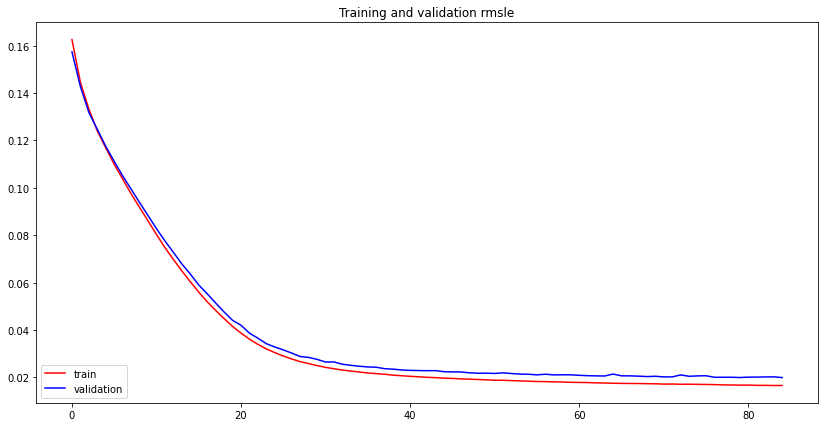

<Figure size 432x288 with 0 Axes>

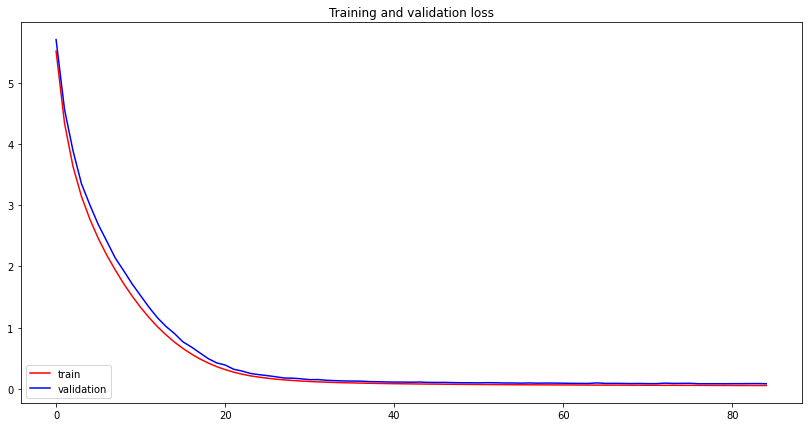

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
rmsle=history.history['rmsle_K'][3:]
val_rmsle=history.history['val_rmsle_K'][3:]
loss=history.history['loss'][3:]
val_loss=history.history['val_loss'][3:]

epochs=range(len(rmsle)) # Get number of epochs

plt.figure(figsize=(14,7))
#------------------------------------------------
# Plot training and validation rmsle per epoch
#------------------------------------------------

plt.plot(epochs, rmsle, 'r', label='train')
plt.plot(epochs, val_rmsle, 'b', label='validation')
plt.title('Training and validation rmsle')
plt.legend(loc="lower left")

plt.figure()
plt.figure(figsize=(14,7))
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='train')
plt.plot(epochs, val_loss, 'b', label='validation')
plt.legend(loc="lower left")

plt.title('Training and validation loss')



# Desired output. Charts with training and validation metrics. No crash :)

### Predict chosen observation

In [29]:
np.exp(model.predict(df_numerical_feats.loc[18206].values.reshape(-1,df_numerical_feats.shape[1])))

array([[490062.97]], dtype=float32)

In [30]:
y_validation.tail()

,cena
4548,485000.0
4549,399000.0
4550,1033218.0
4551,325000.0
4552,357654.0


### Evaluate test set

In [31]:
model.evaluate(x_test, y_test_log)

143/143 [==============================] - 0s 2ms/step - loss: 0.0895 - rmsle_K: 0.0204


[0.08946174383163452, 0.020378362387418747]

## Features importance checking

In [32]:
from keras.wrappers.scikit_learn import KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [37]:
my_model = KerasRegressor(build_fn=get_model, optimizer=opt)    
my_model.fit(x_train,
             y_train_log,
             epochs=200,
             validation_data= (x_val, y_validation_log), 
             callbacks = [tf.keras.callbacks.EarlyStopping(monitor ='val_loss', patience=5)])

perm = PermutationImportance(my_model, random_state=1).fit(x_train,y_train_log)
eli5.show_weights(perm, feature_names = df_numerical_feats.columns.tolist())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               2816      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 9         
Total params: 11,601
Trainable params: 11,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
427/427 [==============================] - 2s 4ms/step - loss: 106.3032 - rmsle_K: 1.3980 - val_loss: 51.1910 - val_rmsle_K: 0.7471
Epoch 2/200
427/427 [==============================] - 2s 4ms/step - loss: 22.5450 - rmsle_K: 0.3970 - v

Weight,Feature
0.8175 ± 0.0302,winda
0.7945 ± 0.0280,oferta_cat
0.7121 ± 0.0515,dzielnica_cat
0.6059 ± 0.0450,balkon_cat
0.3109 ± 0.0308,ulica_cat
0.2801 ± 0.0181,czynsz
0.2193 ± 0.0235,ogrzewanie_merged_cat
0.1951 ± 0.0036,rynek_cat
0.1912 ± 0.0415,ulica_i_nr_cat
0.1829 ± 0.0018,powierzchnia
